# Python machine learning
<hr>

```{admonition} Goals and prerequisites
**Goals**: 

- Learn and use some common marchine learning methods for data analysis.

**Prerequisites**: 
- Can install and import a Python library.
- Can use Pandas and Numpy to process data. 
- Can draw a picture in Python.
- Can define a Python fuction.
```

In this chapter, we explain how to perform some machine leanrning methods using Python. Rather than delving into the theoretical and computational details of those methods, we aim to provide intuitive, visual explanations that are easy to understand.

One key machine leanring library in Python is `scikit-learn`, which focuses on some classical machine lenarning methods such as linear regression, supoport vector machine, random forest, clustring, and so on. 

Install it using `pip install`:

```dos
pip install scikit-learn
```

When we use this library in Python, its name is `sklearn`.

Another widely used marchine learning library is `PyTorch`, which is deep learning framework and build some deep learning networks like RNN, CNN, Transformer, and so on.

## Linear regression
<hr>

linear regression is a model that estimates the relationship between a scalar `response` (dependent variable) and one or more `explanatory variables` (regressor or independent variable). 

Linear regression is widely used in biological and social sciences to describe possible relationships between variables. It ranks as **one of the most important tools** used in these disciplines.

For example, for a seaborn dataset "car_crashes", which contains data on car crashes in different U.S. states.

In [1]:
import seaborn as sns

crashes = sns.load_dataset('car_crashes')
crashes.head()  

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Descriptions for each column are below:

| Variable Name       | Description                                                                  |
| ------------------- | ---------------------------------------------------------------------------- |
| `total`             | Total number of car crash deaths per 10,000 people in each state             |
| `speeding`          | Proportion of deaths due to speeding (as a fraction of `total`)              |
| `alcohol`           | Proportion of deaths involving alcohol (as a fraction of `total`)            |
| `not_distracted`    | Proportion of deaths not caused by distraction                           |
| `no_previous`       | Proportion of drivers involved in fatal crashes with no prior violations |                   
| `ins_premium`       | Average insurance paid per driver  |
| `ins_losses`        | Average insurance losses per driver for the insurance company                           |
| `abbrev`            | Two-letter abbreviation of the US state                                      |


A scatter plot for the speeding and total number of crashes is given below.

<Axes: xlabel='speeding', ylabel='total'>

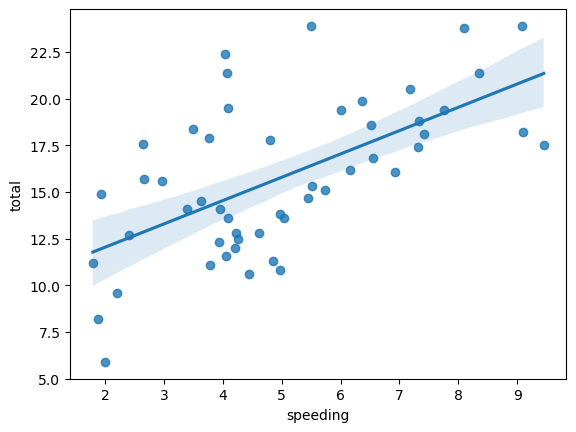

In [12]:
sns.regplot(data=crashes, x="speeding", y="total")

 We may assume there is a linear relationship between the amount of total crashes and the speeding, i.e., 

```{math}
:label: eq-single-variable
\text{total}=\beta_0+\beta_1\text{ speeding}
```

Geometrically, linear regression involves finding **the best-fitting line through a set of points**, represented by a linear equation as shown above, where $\beta_0$ is called the `intercept`.

The most common way to comute the linear regreesion model is by the ordinary least square method, for which we can use the function `OLS()` from the library `Statsmodels`. 

Using the `statsmodels` library to perform regression typically involves the following steps:

* Construct the regression model using the function `OLS()` and `fit()`.
* Output the regression results using the `summary()` function.
* Obtain predicted values using the `predict()` function. This step can be omitted if not for prediction.


In the following code, we build a linear model for the equation {eq}`eq-single-variable` using `statsmodels.formula.api`.

In [4]:
import statsmodels.formula.api as sm

# the linear model is definded by strings the in the formula
model = sm.ols(formula="total ~ speeding", data=crashes).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.87e-06
Time:                        20:53:25   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5459      1.243      7.680      0.0

There are a lot of information in the output table, but we usually concern several key informations:

- Values of coefficicent $\beta_0, \beta_1, \dots$
  - They are given in the column "coef". From them, we can get the fitted model. For this example, it is:
    
    $$
    \text{total}=9.5459 +1.2493 \text{ total}\_\text{speed}
    $$
    
- p-values of the independent variables.
  - The p-values are given in the column "P>|t|". If the p-value of an independe variable is less than 0.05, it means there is **linear relationship** between the independent variable and the dependent variable at 95% confidence level. For this example, the p-values are all 0.000.
- $R^2$
  - It is given by the value on the right of "R-squred: " at the top right of the table. It measures the proportion of variability in the dependent variable explained by the model, with a range between 0 and 1. **The closer it is to 1, the better the model fit**. For this example, it is 0.374.



In regression analysis, there is no universal threshold for what constitutes a "good" R² value, as it heavily depends on the **field of study and research context**. However, here are some general guidelines:
  - R² > 0.7: Often considered **strong** in social sciences or fields with high noise.  
  - R² = 0.3–0.7: **Moderate** explanatory power (common in economics, biology, etc.).  
  - R² < 0.3: **Weak** fit, but may still be meaningful in noisy domains (e.g., psychology, climate studies).  
  - R² ≈ 0: Model explains almost none of the variability.  

The general syntax for the function `ols()` is given below.

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">statsmodels.formula.api.ols(formula, data)</th>
    </tr>
    <tr>
        <td style="text-align:left">formula</td>
        <td style="text-align:left">Usually a string, the formula specifying the model.</td>
    </tr>
    <tr style="text-align:left; border-bottom:solid" >
        <td style="text-align:left">data</td>
        <td style="text-align:left">Usually a DataFrame or dict, the data for the model</td>
    </tr>
</table>
<br />

The general syntax for the formula is below:

> y ~ x1 + x2 + x1:x2 + C(x3)

- `y` is the dependent (response) variable

- `x1`, `x2`, `x3` are independent (regressor) variables
- `C(x3)` means x3 is catorgorical variable
- `~` separates the dependent variable from the predictors

- `+` adds independent variables

- `-1` removes the intercept (by default it’s included)

- `x1:x2` adds an **interaction term** only, which equals x1*x2

- `x1*x2` adds both main terms and the interaction, which equals x1 + x2 + x1*x2

- Normally in regression, we assume that variables affect the outcome independently. But sometimes, the **combined effect** of two variables is more (or less) than just adding their individual effects — that's where `interaction terms` come in.

For example, we can apply a linear regression between the amount of total crashes, the speeding and the alcohol:

$$
\text{total}=\beta_0+\beta_1\text{ speeding}+\beta_2\text{ alcohol}
$$

In [2]:
import statsmodels.formula.api as smf
import seaborn as sns

crashes = sns.load_dataset('car_crashes')

# the linear model is definded by strings the in the formula
model = smf.ols(formula="total ~ speeding + alcohol", data=crashes).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           2.27e-14
Time:                        10:16:11   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6807      0.957      5.934      0.0

Or, if we consider the interaction of speeding and alcohol (drivers with alcohol tend to driving with highe speed):

$$
\text{total}=\beta_0+\beta_1\text{ speeding}+\beta_2\text{ alcohol}+\beta_3\text{ alcohol*speeding}
$$

In [5]:
import statsmodels.formula.api as smf
import seaborn as sns

crashes = sns.load_dataset('car_crashes')

# the linear model is definded by strings the in the formula
# the below code equals: model = smf.ols(formula="total ~ alcohol*speeding", data=crashes).fit()
model = smf.ols(formula="total ~ speeding + alcohol + alcohol:speeding", data=crashes).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     58.91
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           5.91e-16
Time:                        10:17:58   Log-Likelihood:                -104.31
No. Observations:                  51   AIC:                             216.6
Df Residuals:                      47   BIC:                             224.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.8936      2.236  

For the catogorical variable, we use the dataset "tips" as an example to fit the following equation:

$$
\text{tip}=\beta_0+\beta_1\text{ total}\_\text{bill}+\beta_2\text{ day}
$$

In [10]:
import statsmodels.formula.api as smf
import seaborn as sns

tips = sns.load_dataset('tips')

# the linear model is definded by strings the in the formula
model = smf.ols(formula="tip ~ total_bill + C(day)", data=tips).fit()

# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.67
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           7.52e-31
Time:                        10:52:58   Log-Likelihood:                -350.03
No. Observations:                 244   AIC:                             710.1
Df Residuals:                     239   BIC:                             727.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9205      0.186      4.943

```{note}
Linear regression can also be performed using non-formula-based modeling, non-OLS methods or other libraries, which are omitted here due to space limitations.
```

## Standardize Data
<hr>

`Standardization` is a process of transforming the data to make it more suitable for some statistical analysis or machine learning. 

The main reasons include:

- To remove the effect of different units and scales

  * Variables may have different units (e.g., dollars, percentages, counts).
  * Without standardization, variables with larger scales may dominate the model (especially in regression or distance-based models like KNN, SVM).

- To compare variable importance

  * In regression, standardized coefficients allow you to compare which variable has a stronger effect on the outcome. Standarization is usually operational for OLS regression, but suggested for non-OLS regreesino such as Ridge/Lasso/Elastic Net regression.
 
- To improve model performance

  * Many machine learning models (e.g., gradient descent-based, PCA, K-means) work better when input features are on similar scales.

- To meet assumptions of some statistical tests

  * Some models assume variables are normally distributed or centered around 0, especially in multivariate analysis.

There are two common methods for standardizing data: z-score standardization and min-max standardization

1. **Z-score Standardization** (`StandardScaler`)

Transforms data to have mean ($\mu$) = 0 and standard deviation ($\sigma$) = 1.

$$
z = \frac{x - \mu}{\sigma}
$$

In python, it is easy to standardize the data with the method `fit_transform( )` from `sklearn`.

In [4]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

crashes = sns.load_dataset('car_crashes')
scaler = StandardScaler()
crash_standard = scaler.fit_transform(crashes.iloc[:, 0:-1]) # standard
print(crash_standard[1:10]) # print the first 10 rows
crash_standard.data

[[ 0.56593556  1.2126951  -0.21131068  0.60853209  0.80725756  0.94325764
  -0.02289992]
 [ 0.68844283  0.75670887  0.18761539  0.45935701  1.03314134  0.0708756
  -0.98177845]
 [ 1.61949811 -0.48361373  0.54740815  1.67605228  1.95169961 -0.33770122
   0.32112519]
 [-0.92865317 -0.39952407 -0.8917629  -0.594276   -0.89196792 -0.04841772
   1.26617765]
 [-0.5366299   0.01692    -0.63009543 -0.63369765 -0.29104195 -0.2914793
   0.22027622]
 [-1.22267063 -0.01511416 -0.5833691  -0.9356316  -1.38129335  1.02964051
   1.32270187]
 [ 0.10040792  0.57951992 -0.01564416  0.1166575   0.54542553  1.42128062
   0.6907692 ]
 [-2.42324191 -1.49769509 -1.92383077 -1.71868879 -2.17430102  2.19175919
   0.06330968]
 [ 0.51693265 -0.62025945  0.17768604  0.64840171  0.7568227   1.54737129
   0.39391538]]


- For the input parmater X in the method `fit_transform(X)`, X is an array-like of shape (n_samples, n_features).

2. **Min-Max Normalization** (0-1 Scaling)

This method scales data to the **\[0, 1]** range.

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

In [10]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

crashes = sns.load_dataset('car_crashes')
scaler = MinMaxScaler()
crash_standard = scaler.fit_transform(crashes.iloc[:, 0:-1]) # min-max
print(crash_standard[1:10]) # print the first 10 rows

[[0.67777778 0.73504832 0.34718769 0.66344003 0.72262679 0.62393111
  0.45684192]
 [0.70555556 0.61608775 0.42806394 0.63303046 0.77737321 0.39042695
  0.24636258]
 [0.91666667 0.29250457 0.50100651 0.88105566 1.         0.28106617
  0.5323574 ]
 [0.33888889 0.31444241 0.20923623 0.41824574 0.31079324 0.35849657
  0.73980184]
 [0.42777778 0.42308697 0.26228538 0.41020958 0.45643693 0.29343805
  0.51022048]
 [0.27222222 0.41472969 0.27175844 0.34865988 0.19219766 0.64705258
  0.75220923]
 [0.57222222 0.56986158 0.38685613 0.56317063 0.65916775 0.75188004
  0.61349638]
 [0.         0.02794463 0.         0.18903246 0.         0.95810844
  0.47576542]
 [0.66666667 0.25685558 0.42605092 0.67156751 0.71040312 0.78562981
  0.54833527]]


- There is no negative values after standarization for this method.
- Inverse standardization can be through the method `inverse_transform()`. 

## Principle component analysis (PCA)
<hr>

Principal component analysis (PCA) is a **dimensionality reduction** to simplify a large data set into a smaller set, while preserving their most important structures. 

It represent a transformation of the original variables into a new set of uncorrelated variables through linear combinations. This transformation is structured such that the leading components account for the **maximal possible information (reflected by the data variance)** in the data, effectively compressing the key information into fewer dimensions.

- For example, there are 10 variables in the original data set. We can use PCA to reduce the number of variables to 3 and keep 85% of the original information.

In [9]:
import seaborn as sns

data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


There are 4 variables in addition to the last categorical variable. We use the class `PCA` from the libraray `sklearn` for reducing to 2 varaibles.

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_standard = scaler.fit_transform(data.iloc[:, 0:-1])
pca = PCA(n_components=2)  # the number of principal components
pca.fit(iris_standard)  # fit the data by PCA
print(
    f"explained variance of each principal component: {pca.explained_variance_ratio_}"
)  # output the explained variance ratio

principal_components = pca.fit_transform(iris_standard)
print(f"principal components shown the first 10 rows:\n {principal_components[0:10]}")

explained variance of each principal component: [0.72962445 0.22850762]
principal components shown the first 10 rows:
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]]


- It is recommended to standarizing the data before applying PCA.
- Specify the number of principal components through the parameter `n_components` in `PCA( )`.
- Fit the data by PCA through the method `fit( )`.
- Usually, the cumulated explained variance ratio of the specified principal components should be greather equal than 85%.
  - In this example, the cumluated explained variance ratiso is 0.729 + 0.228 = 0.954 > 0.85.

- Get the principal components (the values of the reduced variables) by the method `fit_transform( )`.
- The results of PCA may vary each time it is run unless you set the `random_state` parameter in `PCA( )`.

```{note}
PCA is generally used as an intermediate step in data analysis. It is often applied for dimensionality reduction before further tasks such as clustering, classification, or visualization.
```

*The solution to principal component analysis (PCA) is generally obtained via eigenvalue decomposition. Specifically, one computes the eigenvectors corresponding to the largest eigenvalues of the covariance matrix or the correlation matrix of the original data. The eigenvector associated with the largest eigenvalue is the first principal component, the eigenvector associated with the second largest eigenvalue is the second principal component, and the remaining principal components are obtained in descending order accordingly. The proportion of variance explained (also called the contribution rate) of each principal component is defined as the ratio of its corresponding eigenvalue to the sum of all eigenvalues.

## Clustering
<hr>

K-means is a dynamic clustering method. Its basic idea is as follows: first, randomly select K points as the initial centroids, and assign points to K clusters based on the nearest distance principle; then, recalculate the centroids of the K clusters as the new centroids, and reassign points according to the nearest distance principle; this process is repeated until the centroids no longer change.

Now, we use K-means to cluster the iris data.

- Specify the number of clusters through the parameter `n_clusters` in `KMeans( )`.
- Get the clustering result by the method `fit_predict( )`.
- Get the clusgtering centers by the attribute `cluster_centers_`.

```{note}
Both sklearn and seaborn provide datasets for data analysis, but their formats differ. Seaborn datasets are returned as Pandas DataFrames, while scikit-learn datasets are provided as objects with attributes.
```

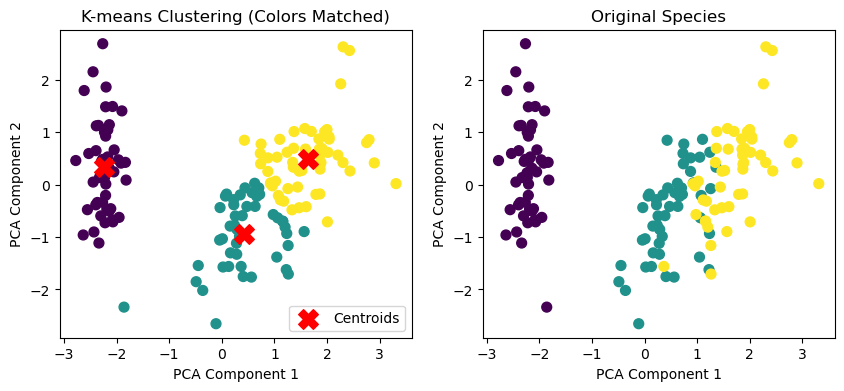

In [13]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler

# Load Iris dataset and standardize
iris = datasets.load_iris()
# standardize
scaler = StandardScaler()
X = scaler.fit_transform(iris.data) # visit the data values by visiting the data attribute
y_true = iris.target  # Original species labels

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

# * Map K-means labels to match true labels (for consistent colors)
labels_mapped = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i)
    # mode computation
    # set the predicted label corresponding to the true label
    labels_mapped[mask] = mode(y_true[mask])[0]

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
centers_2d = pca.transform(kmeans.cluster_centers_)

# Plot side by side: K-means vs True labels with consistent colors
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Left: K-means clusters (mapped)
# 'viridis' is the name of a predefined colormap in Matplotlib.
# It defines a gradient of colors that Matplotlib uses to map numeric values to colors.
# 'viridis' specifically is a smooth gradient from dark purple → blue → green → yellow.
axes[0].scatter(X_2d[:,0], X_2d[:,1], c=labels_mapped, cmap='viridis', s=50)
axes[0].scatter(centers_2d[:,0], centers_2d[:,1], c='red', s=200, marker='X', label='Centroids')
axes[0].set_title("K-means Clustering (Colors Matched)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")
axes[0].legend()

# Right: Original species
axes[1].scatter(X_2d[:,0], X_2d[:,1], c=y_true, cmap='viridis', s=50)
axes[1].set_title("Original Species")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

plt.show()

## Artificial neural network (ANN)
<hr>

Artificial neural network tries to imiate the function of a human brain.

How a human brain work: the brain continuously sends and receives electrical and chemical signals throughout the body. Some signals make us feel tired, while others allow us to perceive pain. To accomplish this complex communication, the central nervous system depends on billions of neurons (nerve cells).

Below is picture about the stucture of a neuron.

![bnn](biology_neuro.png)

Neurons typically receive signals through their dendrites and transmit them via their axons to the dendrites of other neurons. They are electrically excitable: when the membrane voltage changes sufficiently within a short time, the neuron generates an all-or-none electrochemical pulse known as an action potential. This pulse propagates rapidly throughout the body.

![ann1](artificial_neuro.png)

The neural network approach is inspired by the biological structure of human neurons. Input signals are first combined through weighted sums (weights $w$ and biases $b$) and then passed through an activation function, which determines the amount of information transmitted. The resulting output signals are finally sent to the next neuron.

The computational principle of artificial neural network algorithms is as follows: input information is propagated forward to produce an output, and the error between the actual output and the expected output is calculated. The network parameters (weights $w$ and biases $b$) are then updated through backpropagation. This process is repeated iteratively, gradually reducing the error during propagation, until it falls below a predefined threshold.

The following is an artificial neural network of two hidder layers and there are 3 neurons in the input, output and each hidder layers.

![ann2](ann.png)

General process for using ANN:

- load data;
- split the data into training and testing sets;
- standaridize the data;
- build the network model and train;
- used the trained network to predict for the test set;
- report the accuracy.

We use the artificial neuron network from sklearn to clasify the iris data.

In [12]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
# stratify=y ensures that the training and test sets maintain the same class proportions as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the artificial neural network
# both hidden layers have 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Report accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2%}")

Test set accuracy: 96.67%


There are more complex and powerful ANN structures, such as:

- Recurrent Neural Networks (RNNs): designed for sequential data like time series, text, or speech; process input step by step, keeping memory of previous steps. Variants:

    - LSTM (Long Short-Term Memory)

    - GRU (Gated Recurrent Unit)


- Convolutional Neural Networks (CNNs): designed for image, video, or spatial data; use convolutional layers to automatically extract features. Examples:

    - LeNet, AlexNet, VGG, ResNet



- Transformers: modern state-of-the-art for natural language processing (NLP), sequences, and even images; use self-attention mechanisms to capture long-range dependencies. Examples:

    - BERT, GPT, Vision Transformer


- Generative Adversarial Networks (GANs): consist of two networks (generator and discriminator) competing; used for image generation, style transfer, and games.

- Graph Neural Networks (GNNs): work with graph-structured data, like social networks or molecular structures. Examples:
    - GCN, GraphSAGE

Those complex networks are usually built using frameworks like `PyTorch` or `TensorFlow`.

## Support vector machine (SVM)
<hr>

Support vector machines are supervised machine learning algorithms that analyze data for classification and regression analysis.

The geometric idea behind SVM is to find a decision boundary (which is a line in two dimensional space) that separates classes with the maximum possible margin. The data points that lie closest to this boundary are called support vectors.

![svm1](svm1.png)

The following codes apply SVM to classify the Iris dataset.

In [11]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data    # Features
y = iris.target  # Labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures class balance
)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Apply same transformation to test data

# Create the SVM classifier (RBF kernel)
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_scaled, y_train)  # Train the SVM on scaled training data

# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2%}\n")

Test set accuracy: 96.67%



## Exercises
<hr>

```{exercise}
:label: regression
Use the library `statsmodels` to do some linear regressions for the 'tips' dataset in the seaborn library.

```

<script src="https://giscus.app/client.js"
        data-repo="RobinChen121/book-Python-Data-Science-en"
        data-repo-id="R_kgDOOt-49A"
        data-category="General"
        data-category-id="DIC_kwDOOt-49M4C2R1O"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="preferred_color_scheme"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>